## COVID-19 chest X ray practice 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import * #(layers, models, optimizers,preprocessing)
from tensorflow.keras.layers import * #(Conv2D, Dense, MaxPooling2D, Flatten, Dropout)
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [2]:
main_dir='./chest_xray/chest_xray/'
classification_dir=[('NORMAL'),('PNEUMONIA')]
resolution=128
def load_images(root_dir_name):
    X=[]
    y=[]
    
    for label, sub_dir_name in enumerate(classification_dir):
        print (f'loading {root_dir_name} {sub_dir_name}')
        sub_dir_path=os.path.join(main_dir, root_dir_name, sub_dir_name)
            
        for image_name in os.listdir(sub_dir_path):
            if label==1 and 'virus' in image_name: continue
            image_path= os.path.join(sub_dir_path, image_name)
            image= preprocessing.image.load_img(image_path,
                                                color_mode='grayscale',
                                                target_size=(resolution,resolution))#128*128
            X.append(preprocessing.image.img_to_array(image))
            y.append(label)
    X=np.array(X)/255.0
    y=np.array(y)
    
    return X,y

In [3]:
# Training
X_train, y_train =load_images('train')
X_test, y_test = load_images('test')

loading train NORMAL


FileNotFoundError: [WinError 3] 系統找不到指定的路徑。: './chest_xray/chest_xray/train\\NORMAL'

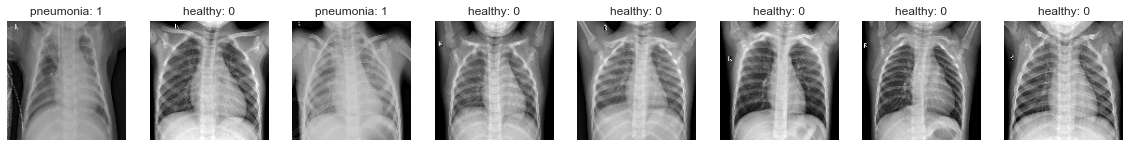

In [4]:
# Visualizing Brain tumors
c=8

fig, subplots = plt.subplots(1,c)
fig.set_size_inches(20,5)
for i in range(c):
    n= np.random.randint(0, len(X_train))
    num = y_train[n]
    word= 'healthy' if num==0 else"pneumonia"
    
    subplots[i].imshow(X_train[n].reshape((resolution,resolution)),
                      cmap='gray')
    subplots[i].set_title(f'{word}: {num}')
    subplots[i].axis('off')
plt.show()


In [5]:
#Building a Convolutional neural network
input_shape=(resolution,resolution,1)
model=models.Sequential()
model.add(Conv2D(32, kernel_size=(2,2),strides=(1,1),
                 activation='linear', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64, kernel_size=(2,2),strides=(1,1),
                 activation='linear'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128, kernel_size=(2,2),strides=(1,1),
                 activation='linear'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256, kernel_size=(2,2),strides=(1,1),
                 activation='linear'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512, kernel_size=(2,2),strides=(1,1),
                 activation='linear'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 32)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       1

In [6]:
model.compile(optimizer='rmsprop', loss= 'binary_crossentropy', metrics=['accuracy'])

In [7]:
train_history=model.fit(X_train,y_train, batch_size=8, epochs=10, 
          validation_data=(X_test,y_test))

Epoch 1/10
484/484 [==============================] - 86s 177ms/step - loss: 0.7194 - accuracy: 0.8633 - val_loss: 1.0664 - val_accuracy: 0.7143
Epoch 2/10
484/484 [==============================] - 91s 188ms/step - loss: 0.1219 - accuracy: 0.9584 - val_loss: 0.9196 - val_accuracy: 0.7311
Epoch 3/10
484/484 [==============================] - 95s 197ms/step - loss: 0.0823 - accuracy: 0.9718 - val_loss: 1.1771 - val_accuracy: 0.7101
Epoch 4/10
484/484 [==============================] - 98s 203ms/step - loss: 0.0646 - accuracy: 0.9780 - val_loss: 1.2210 - val_accuracy: 0.7500
Epoch 5/10
484/484 [==============================] - 105s 216ms/step - loss: 0.0485 - accuracy: 0.9824 - val_loss: 0.7114 - val_accuracy: 0.8403
Epoch 6/10
484/484 [==============================] - 99s 205ms/step - loss: 0.0370 - accuracy: 0.9889 - val_loss: 2.8022 - val_accuracy: 0.7290
Epoch 7/10
484/484 [==============================] - 102s 210ms/step - loss: 0.0272 - accuracy: 0.9902 - val_loss: 2.6537 - val_

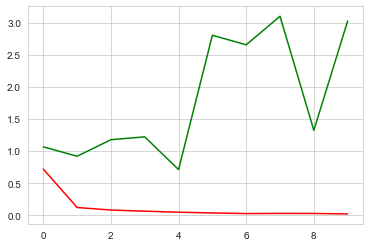

In [8]:
plt.plot(train_history.history['loss'],'r')
plt.plot(train_history.history['val_loss'],'g')

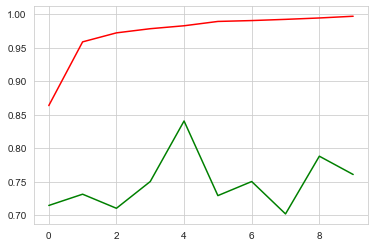

In [10]:
plt.plot(train_history.history['accuracy'],'r')
plt.plot(train_history.history['val_accuracy'],'g')

In [3]:
os.listdir('./chest_xray/train')

['NORMAL', 'PNEUMONIA']

In [4]:
#Data Visualization

train_dir='./chest_xray/train'
test_dir='./chest_xray/test'
val_dir='./chest_xray/val'

print('Train set:\n--------------------------------')
num_pneumonia=len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal=len(os.listdir(os.path.join(train_dir,'NORMAL')))
print(f'PNEUMONIA={num_pneumonia}')
print(f'NORMAL={num_normal}')

print('Test set:\n---------------------------------')
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f'PNEUMONIA={len(os.listdir(os.path.join(test_dir, "NORMAL")))}')

print('Validation set:\n---------------------------')
print(f'PNEUMONIA={len(os.listdir(os.path.join(val_dir, "PNEUMONIA")))}')
print(f'PNEUMONIA={len(os.listdir(os.path.join(val_dir, "NORMAL")))}')

Train set:
--------------------------------
PNEUMONIA=3875
NORMAL=1341
Test set:
---------------------------------
PNEUMONIA=390
PNEUMONIA=234
Validation set:
---------------------------
PNEUMONIA=8
PNEUMONIA=8


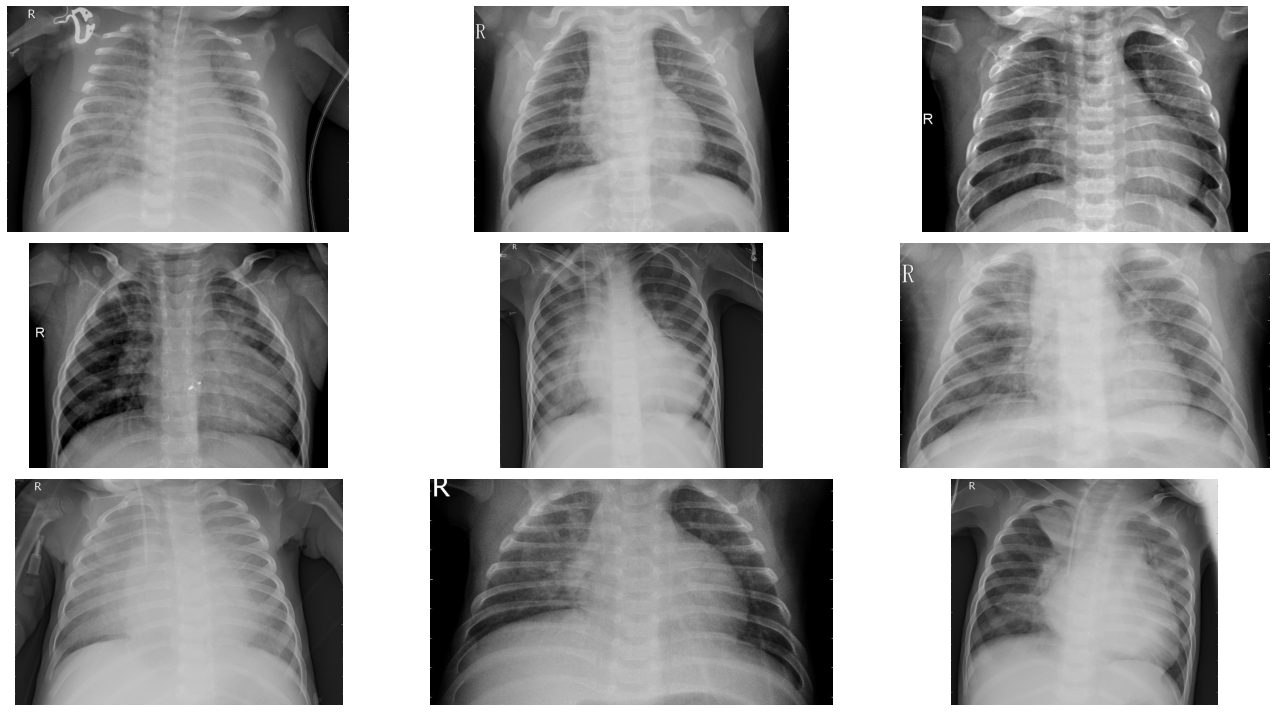

In [5]:
pneumonia= os.listdir('./chest_xray/train/PNEUMONIA')
pneumonia_dir='./chest_xray/train/PNEUMONIA'

plt.figure(figsize=(20,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    img=plt.imread(os.path.join(pneumonia_dir,pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

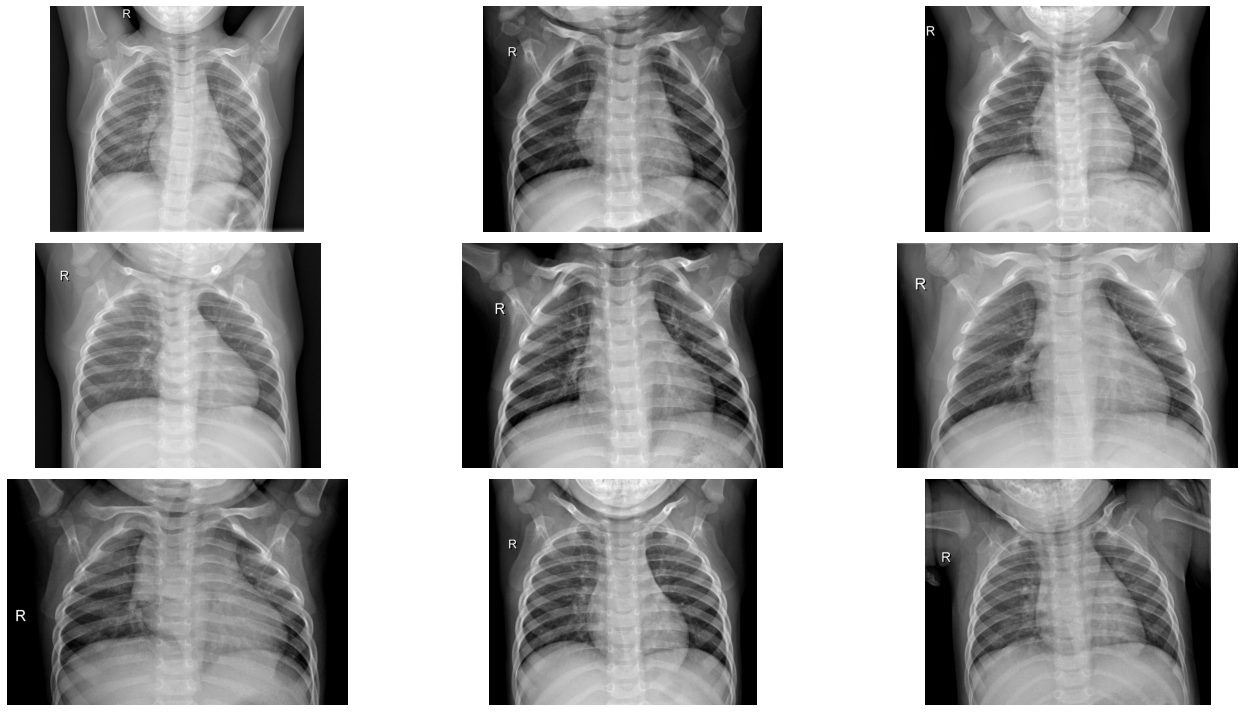

In [6]:
normal=os.listdir('./chest_xray/train/NORMAL')
normal_dir='./chest_xray/train/NORMAL'

plt.figure(figsize=(20,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    img= plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 1422 pixels width and 1422 pixels height,one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 100.6506 and he standard deviation is 59.8083


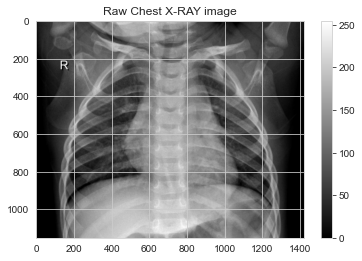

In [7]:
normal_img=os.listdir('./chest_xray/train/NORMAL')[1]
normal_dir='./chest_xray/train/NORMAL'
sample_img=plt.imread(os.path.join(normal_dir,normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X-RAY image')

print(f"The dimensions of the image are {sample_img.shape[1]} pixels width and {sample_img.shape[1]} pixels height,one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and he standard deviation is {sample_img.std():.4f}")


Text(0, 0.5, '# Pixel in Image')

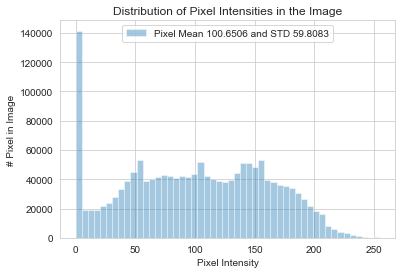

In [8]:
# investigate pixel value distribution
sns.distplot(sample_img.ravel(),
             label=f"Pixel Mean {np.mean(sample_img):.4f} and STD {np.std(sample_img):.4f}",
             kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel in Image')

In [9]:
#img preprocessing
'''
Before training, we'll first modify your images to be better suited for 
training a convolutional neural network.
'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator= ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True)

In [10]:
#Build a separate generator for valid and test sets
'''
flow_from_directory:以文件夾路徑為參數，生成通過數據提升/歸一化後的數據，在一個無限循環中無限產生batch數據
flow_from_dataframe:輸入dataframe和目錄的路徑，並生成批量的增強/標準化的數據。
'''
train= image_generator.flow_from_directory(train_dir,
                                           batch_size=8,
                                           shuffle=True,
                                           class_mode='binary',
                                           target_size=(180,180))
validation=image_generator.flow_from_directory(val_dir,
                                               batch_size=1,
                                               shuffle=False,
                                               class_mode='binary',
                                               target_size=(180,180))
test=image_generator.flow_from_directory(test_dir,
                                         batch_size=1,
                                         shuffle=False,
                                         class_mode='binary',
                                        target_size=(180,180))


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 2.3215 and the minimum is -3.3234
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


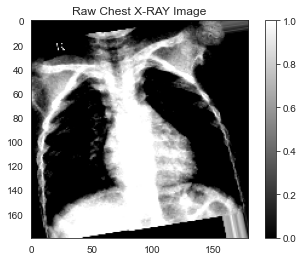

In [11]:
sns.set_style('white')
generated_image, label= train.__getitem__(2)
plt.imshow(generated_image[2], cmap='gray')
plt.colorbar()
plt.title("Raw Chest X-RAY Image")

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(-6.949999999999996, 0.5, '# Pixels in Image')

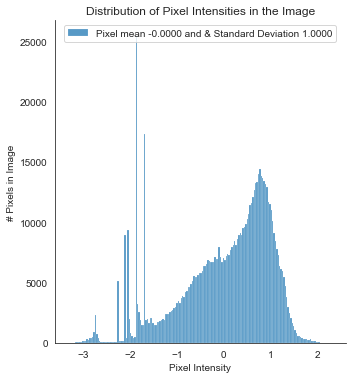

In [12]:
sns.displot(generated_image.ravel(),
            label=f"Pixel mean {np.mean(generated_image):.4f} and & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel("# Pixels in Image")

In [13]:
#建立CNN model
#Class weights
weight_for_0=num_pneumonia/(num_normal+num_pneumonia)
weight_for_1=num_normal/(num_normal+num_pneumonia)

class_weight={0:weight_for_0, 1:weight_for_1}

print(f'weight for class 0 :{weight_for_0: .2f}')
print(f'weight for class 1 :{weight_for_1: .2f}')

weight for class 0 : 0.74
weight for class 1 : 0.26


In [14]:
#使用relu
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 178, 178, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 176, 176, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 86, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 86, 86, 64)        2

In [15]:
r=model.fit(train,
           epochs=8,
           validation_data=validation,
           class_weight=class_weight,
           steps_per_epoch=5216//64,
           validation_steps=4)

Epoch 1/8
81/81 [==============================] - 104s 1s/step - loss: 0.6143 - accuracy: 0.7593 - val_loss: 19.7326 - val_accuracy: 0.0000e+00
Epoch 2/8
81/81 [==============================] - 114s 1s/step - loss: 0.1748 - accuracy: 0.7809 - val_loss: 19.2663 - val_accuracy: 0.0000e+00
Epoch 3/8
81/81 [==============================] - 102s 1s/step - loss: 0.1435 - accuracy: 0.7762 - val_loss: 27.6640 - val_accuracy: 0.0000e+00
Epoch 4/8
81/81 [==============================] - 106s 1s/step - loss: 0.0993 - accuracy: 0.8380 - val_loss: 32.6006 - val_accuracy: 0.0000e+00
Epoch 5/8
81/81 [==============================] - 105s 1s/step - loss: 0.1185 - accuracy: 0.8272 - val_loss: 0.2057 - val_accuracy: 1.0000
Epoch 6/8
81/81 [==============================] - 106s 1s/step - loss: 0.0981 - accuracy: 0.9120 - val_loss: 2.8988 - val_accuracy: 0.0000e+00
Epoch 7/8
81/81 [==============================] - 107s 1s/step - loss: 0.0985 - accuracy: 0.9074 - val_loss: 86.5122 - val_accuracy: 0.

Text(0.5, 1.0, 'Accuracy Evolution')

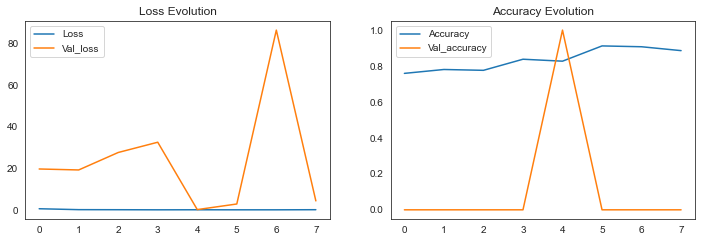

In [16]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2,2,2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_accuracy')
plt.legend()
plt.title('Accuracy Evolution')


In [17]:
#evaluation (評估)
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 34s 55ms/step - loss: 0.8927 - accuracy: 0.7580
Test Accuracy: 75.80%
652/652 [==============================] - 245s 376ms/step - loss: 0.2245 - accuracy: 0.9222
Train Accuracy: 92.22%


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

pred=model.predict(test)

print(confusion_matrix(test.classes, pred>0.5))
pd.DataFrame(classification_report(test.classes, pred>0.5, 
                                   output_dict=True))


[[ 98 136]
 [  7 383]]


,0,1,accuracy,macro avg,weighted avg
precision,0.933333,0.737958,0.770833,0.835645,0.811224
recall,0.418803,0.982051,0.770833,0.700427,0.770833
f1-score,0.578171,0.842684,0.770833,0.710428,0.743492
support,234.000000,390.000000,0.770833,624.000000,624.000000


In [19]:
print(confusion_matrix(test.classes, pred>0.7))
pd.DataFrame(classification_report(test.classes, pred>0.7,
                                   output_dict=True))

[[137  97]
 [ 16 374]]


,0,1,accuracy,macro avg,weighted avg
precision,0.895425,0.794055,0.81891,0.844740,0.832069
recall,0.585470,0.958974,0.81891,0.772222,0.818910
f1-score,0.708010,0.868757,0.81891,0.788384,0.808477
support,234.000000,390.000000,0.81891,624.000000,624.000000


In [20]:
# 使用 VGG16 模板

#from keras.models import Sequential
#from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16

In [21]:
vgg16_base_model=VGG16(input_shape=(180,180,3),
                       include_top=False,
                       weights='imagenet')

In [22]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [23]:
vgg16_model= tf.keras.Sequential([
    vgg16_base_model,
    GlobalAveragePooling2D(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.6),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1,activation='sigmoid')
])

In [24]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS=['accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
        ]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',
                    metrics=METRICS)

In [25]:
r=vgg16_model.fit(train,
                 epochs=10,
                 validation_data=validation,
                 class_weight=class_weight,
                 steps_per_epoch=100,
                 validation_steps=25)

Epoch 1/10
100/100 [==============================] - 525s 5s/step - loss: 0.2812 - accuracy: 0.6237 - precision: 0.8722 - recall: 0.5877 - val_loss: 9.1802 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 521s 5s/step - loss: 0.2372 - accuracy: 0.6925 - precision: 0.8874 - recall: 0.6621
Epoch 3/10
100/100 [==============================] - 530s 5s/step - loss: 0.1906 - accuracy: 0.7625 - precision: 0.9283 - recall: 0.7312
Epoch 4/10
100/100 [==============================] - 568s 6s/step - loss: 0.1679 - accuracy: 0.8000 - precision: 0.9462 - recall: 0.7812
Epoch 5/10
100/100 [==============================] - 575s 6s/step - loss: 0.1660 - accuracy: 0.8188 - precision: 0.9425 - recall: 0.8037
Epoch 6/10
100/100 [==============================] - 593s 6s/step - loss: 0.1545 - accuracy: 0.8163 - precision: 0.9549 - recall: 0.7971
Epoch 7/10
100/100 [==============================] - 578s 6s/step - loss: 0.

Text(0.5, 1.0, 'Accuracy Evolution')

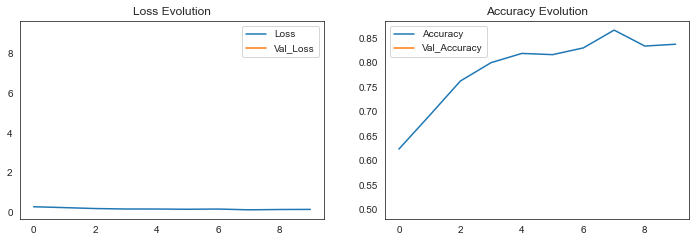

In [26]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [27]:
#評估

evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 153s 245ms/step - loss: 875.7155 - accuracy: 0.7628 - precision: 0.8253 - recall: 0.7872
Test Accuracy: 76.28%
652/652 [==============================] - 1291s 2s/step - loss: 1336.5975 - accuracy: 0.7759 - precision: 0.9737 - recall: 0.7177
Train Accuracy: 77.59%
